<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

# Data Analytics Basics in Python Series

## Chapter I: Pandas DataFrames for Working with Tabular Data in Python 

### Michael Pyrcz, Associate Professor, The University of Texas at Austin 

*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

#### Tabular Data

This is a tutorial for / demonstration of **Tabular Data Structures in Python**.  In Python, the common tool for dealing with Tabular Data Structures is the DataFrame from the pandas Python package. 

This tutorial includes the methods and operations that would commonly be required for Engineers and Scientists working with Tabular Data Structures for the purpose of:

1. Data Checking and Cleaning
2. Data Mining / Inferential Data Analysis
3. Data Analytics / Building Predictive Models with Geostatistics and Machine Learning

Learning to work with Pandas DataFrames is essential for dealing with tabular data (e.g. well data) in subsurface modeling workflows and for subsurface machine learning.

##### Tabular Data Structures

In Python we will commonly store our data in two formats, tables and arrays.  For sample data with typically multiple features $1,\ldots,m$ over $1,\ldots,n$ samples we work with tables.  For exhaustive maps and models usually representing a single feature on a regular grid over $1,\ldots,n_{i}$ for $i = 1,\ldots,n_{dim}$ we will work with arrays.

| $X^1$       | $X^2$       | $\ldots$    | $X^m$       | $y$       |
| ----------- | ----------- | ----------- | ----------- | --------- |
| $X^1_1$     | $X^2_1$     | $\ldots$    | $X^m_1$     | $y_1$     |
| $X^1_2$     | $X^2_2$     | $\ldots$    | $X^m_2$     | $y_2$     |
| $\ldots$    | $\ldots$    | $\ldots$    | $\ldots$    | $\ldots$  |
| $X^1_n$     | $X^2_n$     | $\ldots$    | $X^m_n$     | $y_n$     |


**pandas** package provides a convenient DataFrame object for working with data in a table and numpy package provides a convenient ndarray object for working with gridded data. In the following tutorial we will focus on DataFrames although we will utilize ndarrays a couple of times.  There is another section on Gridded Data Structures that focuses on ndarrays.

#### Project Goal

Learn the basics for working with Tabular Data Structures in Python with pandas DataFrames.

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import os                                       # operating system 
import numpy as np                              # arrays and matrix math
import pandas as pd                             # DataFrames
import matplotlib.pyplot as plt                 # plotting

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  



#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this directory.  When we are done with this tutorial we will write our new dataset back to this directory.  

In [2]:
os.chdir("c:/PGE383")                           # set working directory

#### Loading Data 

Let's load the provided multivariate, spatial dataset.  '2D_MV_200wells.csv' is available at https://github.com/GeostatsGuy/GeoDataSets.  It is a comma delimited file with X and Y coordinates,facies 1 and 2 (1 is sandstone and 2 interbedded sand and mudstone), porosity (fraction), permeability (mDarcy) and acoustic impedance (kg/m2s*10^6). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).

In [4]:
#df = pd.read_csv("2D_MV_200wells.csv")          # read in DataFrame (.csv)
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/2D_MV_200wells.csv")
#print(df.iloc[0:5,:])                          # view the first 5 samples
df.head()                                       # view the first 5 samples

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


#### Check the Tabular Data

It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [1]:
df.describe()                                   # summary statistics

NameError: name 'df' is not defined

#### Rename Features

Let's rename the facies, permeability and acoustic impedance for convenience.

In [6]:
df = df.rename(columns={'facies_threshold_0.3': 'facies','permeability':'perm','acoustic_impedance':'ai'}) # rename columns of the 
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


#### Slicing DataFrames

It is straightforward to extract subsets from a DataFrame to make a new DataFrame. 

* We use [my_DataFrame].iloc() with indexes, integers for rows and columns 

* This is useful for cleaning up data by removing features that are no longer of interest.

* Below we make a new DataFrame, 'df_subset', with the rows 0 to 4 and columns 2 to 6 and another new DataFrame, 'df_subset;

In [7]:
df_subset = df.iloc[0:5,2:7]                    # new DataFrame as a slice
df_subset.head(n=10)

,facies,porosity,perm,ai
0,1,0.1184,6.170,2.009
1,1,0.1566,6.275,2.864
2,2,0.1920,92.297,3.524
3,1,0.1621,9.048,2.157
4,1,0.1766,7.123,3.979


In [8]:
df_subset = df.iloc[0:5,2:7]                                # make a new dataframe with just the first 4 samples and no X,Y
#df_subset.head()
print(df_subset)

   facies  porosity    perm     ai
0       1    0.1184   6.170  2.009
1       1    0.1566   6.275  2.864
2       2    0.1920  92.297  3.524
3       1    0.1621   9.048  2.157
4       1    0.1766   7.123  3.979


#### Slicing DataFrames

It is straightforward to extract subsets from a DataFrame to make a new DataFrame. 

* We use [my_DataFrame].loc() with column labels and integers for rows, could be more legible 

* This is useful for cleaning up data by removing features that are no longer of interest.

* Below we make a new DataFrame, 'df_subset', with the rows 0 to 4 and columns X, facies, porosity and perm to another new DataFrame, 'df_subset2'.

In [9]:
df_subset2 = df.loc[:4,['X','Y','facies','porosity','perm']]                    # new DataFrame as a slice
df_subset2.head(n=10)

,X,Y,facies,porosity,perm
0,565,1485,1,0.1184,6.170
1,2585,1185,1,0.1566,6.275
2,2065,2865,2,0.1920,92.297
3,3575,2655,1,0.1621,9.048
4,1835,35,1,0.1766,7.123


#### Deep and Shallow Copies

We must know the difference, or we will eventually run into an issue.

* **shallow copy** - point to the same memory, change one and both are changed

* **deep copy** - make a new copy in memory, change one only one changes

#### Deep Copy Example 

Let's demonstrate a deep copy with the DataFrame member function, [my_DataFrame].copy()

* note, the [my_DataFrame].loc() member function is a deep copy

In [10]:
df_deep_copy = df.copy(deep = True)             # deep copy of the DataFrame
df_deep_copy.loc[4,'ai'] = 4.0                  # change a value in the copy and check original
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


#### Shallow Copy Example

Let's demonstrate a shallow copy with the DataFrame member function, [my_DataFrame].copy()

In [11]:
df_shallow_copy = df.copy(deep = False)         # deep copy of the DataFrame
df_shallow_copy.loc[4,'ai'] = 4.0               # change a value in the copy and check the original
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,4.000


#### Add a New Feature

It is also easy to add a column to our data frame.  

* Note, we assume that the array is in the same order as the samples in the DataFrame.  

This could be an issue if any rows were removed form either before adding etc.  To demonstrate we make a 1D numpy array of zeros using the 'zeros' function and add it to our DataFrame with the feature name indicated as 'zero'.

In [12]:
zeros = np.zeros(200)                                       # make a array of zeros
df['zero'] = pd.Series(zeros)                               # add the array to our DataFrame
df.head()

,X,Y,facies,porosity,perm,ai,zero
0,565,1485,1,0.1184,6.170,2.009,0.0
1,2585,1185,1,0.1566,6.275,2.864,0.0
2,2065,2865,2,0.1920,92.297,3.524,0.0
3,3575,2655,1,0.1621,9.048,2.157,0.0
4,1835,35,1,0.1766,7.123,4.000,0.0


#### Remove a Feature

We can also remove features from the DataFrame.  

* We do this with the member function, [my_DataFrame].drop()

* We just have the give the column name and by indicating axis=1 we specify to drop a column.

In [13]:
df = df.drop('zero',axis=1)                     # remove the zero column
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,4.000


#### Remove a Sample

We can also remove samples from the DataFrame.

* We do this with the member function, [my_DataFrame].drop()

* We just have the give the sample index and by indicating axis=0 we specify to drop a sample.

In [14]:
df = df.drop(3,axis=0)                          # remove the zero column
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
4,1835,35,1,0.1766,7.123,4.000
5,3375,2525,1,0.1239,1.468,2.337


#### Feature Engineering

We may want to make new features by using mathematical operators applied to existing features.  

* For example, we can make a porosity feature in percentage instead of fraction, called 'porosity100'

* Or a ratio of permeability divided by porosity, called 'permpor', may be useful for subsequent calculations such as the Lorenz Coefficient.  

In [15]:
df['porosity100'] = df['porosity']*100          # add a new column with porosity in percentage
df['permpor'] = df['perm']/df['porosity']       # add a new feature with ratio of perm / por 
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265


#### Conditional Manipulation

We could also use conditional statements when assigning values to a new feature.  

* For example, we could have a categorical porosity measure for high and low porosity, called 'tporosity'.

In [16]:
df['tporosity'] = np.where(df['porosity']>=0.12, 'high', 'low') # make a new categorical feature
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243,high
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088,high
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high


#### Conditional Manipulation, More Than One Feature

Here's an example where we use a conditional statement to assign a very low permeability value (0.0001 mD) for all porosity values below a threshold. 

In [17]:
df['perm_cutoff'] = np.where(df['porosity']>=0.12, df['perm'],0.0001) # new feature with conditional truncation
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243,high,6.2750
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680


#### Finding Missing Data

What about missing or invalid values? 

* Let's assign a single porosity value to NaN, 'not a number', indicating a missing or eroneous value.  

* We will then check for the number of NaN values in our DataFrame.  

* Then we can search for and display the sample with the NaN porosity value.

In [18]:
df.loc[1,'porosity'] = np.NaN                   # add a NaN / missing value in our table
print('Number of null values in our DataFrame = ', str(df.isnull().sum().sum())) # count missing values 
nan_rows = df[df['porosity'].isnull()]          # find the sample with missing values
print(nan_rows)                                 # print this sample

Number of null values in our DataFrame =  1
      X     Y  facies  porosity   perm     ai  porosity100    permpor  \
1  2585  1185       1       NaN  6.275  2.864        15.66  40.070243   

  tporosity  perm_cutoff  
1      high        6.275  


#### Likewise Deletion

We can see that sample 1 has a NaN porosity value.  Now we may choose to remove the sample with the NaN.  

* The 'dropna' DataFrame member function will remove all samples with NaN entries from the entire DataFrame.  

* By visualizing the index at the left of the DataFrame preview you can confirm that sample 1 is removed (it jumps from 0 to 2).

In [19]:
df = df.dropna(how='any')                       # drop any rows (samples) with atleast one missing value        
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.9330


#### Conditional Slicing

One could extract samples into a new DataFrame with multiple criteria.

* We make a new DataFrame with all good porosity and good permeability

In [20]:
df_extract = df.loc[(df['porosity'] > 0.12) & (df['perm'] > 10.0)] # extract with multiple conditions to a new table
df_extract.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.297
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.933
7,3715,3045,2,0.1914,116.781,2.187,19.14,610.141066,high,116.781
13,545,3765,1,0.1817,14.311,3.045,18.17,78.761695,high,14.311
15,1385,2415,2,0.1774,22.578,2.711,17.74,127.271702,high,22.578


#### Making a New DataFrame from Scratch

It is also simple to build a new DataFrame from a set of 1D arrays.  

* Note, they must have the same size and be sorted consistently.  

* We will extract porosity and perm as arrays (if you remove '.values' they are extracted as Series, an array retaining the feature name).  

* We then use the pandas DataFrame command to make a new DataFrame with each 1D array and the column names specified as 'porosity' and 'permeability'.

In [21]:
por = df['porosity'].values                     # extract porosity column as vector
perm = df['perm'].values                        # extract permeability column as vector
df_new = pd.DataFrame({'porosity': por, 'permeability': perm}) # make a new DataFrame from the vectors
df_new.head()

,porosity,permeability
0,0.1184,6.170
1,0.1920,92.297
2,0.1766,7.123
3,0.1239,1.468
4,0.1790,31.933


#### Basic Plotting

While I generally use MatPlotLib, Seaborn etc. for plotting, Pandas has built in plotting functions.

#### Line Plots

Here's an example of a line plot.

* there are various other types to choose from, e.g. bar, box, scatter etc.

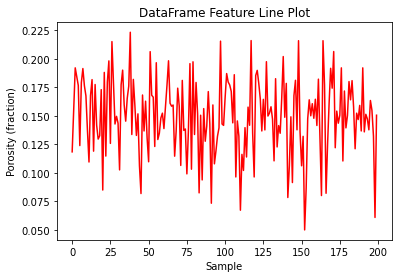

In [22]:
df['porosity'].plot(kind='line',color='red')    # make a line plot
plt.ylabel('Porosity (fraction)'); plt.xlabel('Sample'); plt.title('DataFrame Feature Line Plot'); plt.show()

#### Histograms

Here's an example of a histogram.

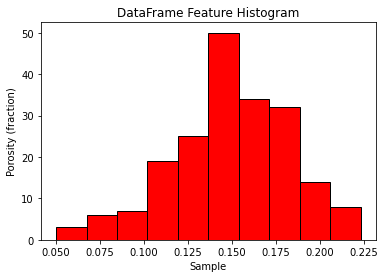

In [23]:
df['porosity'].plot(kind = 'hist',color='red',edgecolor='black') # plot a histogram
plt.ylabel('Porosity (fraction)'); plt.xlabel('Sample'); plt.title('DataFrame Feature Histogram'); plt.show()

#### Accessing the DataFrame Members

We can reach in and retrieve the actual raw information in the DataFrame including the column names and actual values as an numpy array. We can't edit them like this, but we can access and use this information. This includes: 

* 'index' with information about the sample index 
* 'columns' with the names of the features 
* 'values' with the data table entries as a 2D array.   

In [25]:
print(df.index)                                 # get information about the index
print(df.columns)                               # get the list of feature names
print(df.values)                                # get the 2D array with all the table data

Int64Index([  0,   2,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=198)
Index(['X', 'Y', 'facies', 'porosity', 'perm', 'ai', 'porosity100', 'permpor',
       'tporosity', 'perm_cutoff'],
      dtype='object')
[[565 1485 1 ... 52.111486486486484 'low' 0.0001]
 [2065 2865 2 ... 480.71354166666674 'high' 92.29700000000001]
 [1835 35 1 ... 40.334088335220834 'high' 7.122999999999999]
 ...
 [375 1705 1 ... 18.198334595003786 'high' 2.404]
 [3795 535 1 ... 0.25968483256730135 'low' 0.0001]
 [3455 1645 1 ... 6.578073089700997 'high' 0.99]]


#### Retrieving Values DataFrames with [my_DataFrame].values()

We can read values through the values member of DataFrames

In [26]:
por1 = df.values[0,3]                           # get the value for sample 1 of the 4th feature (porosity)
print('Porosity value for sample number 0 is ' + str(por1) + '.') 

Porosity value for sample number 0 is 0.1184.


#### Converting a Pandas DataFrame to a NumPy ndarry

We can copy the entire DataFrame to a ndarray.

In [27]:
df_array = df.to_numpy()                        # copy the DataFrame to an ndarray
print('We just made a ' + str(type(df_array)))  
print('of shape ' + str(df_array.shape))

We just made a <class 'numpy.ndarray'>
of shape (198, 10)


Note this is a deep copy. If we change the ndarray, the DataFrame is not updated.

In [28]:
df_array[2,1] = 10000                           # change an element of the ndarray
df.head(n=3)                                    # check the original DataFrame

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088,high,7.1230


#### Python Built-in Functions on DataFrames

There are some Python built-in functions that accept a DataFrame as an argument.

In [29]:
print('The DataFrame has ' + str(len(df)) + ' samples.') # number of samples
print('The DataFrame\'s features are ' + str(list(df)) + '.') # list of the features 

The DataFrame has 198 samples.
The DataFrame's features are ['X', 'Y', 'facies', 'porosity', 'perm', 'ai', 'porosity100', 'permpor', 'tporosity', 'perm_cutoff'].


#### Directly Editing DataFrames

Let's interact with the DataFrame more surgically, one feature and sample at a time.  

* We can use the [my_DataFrame].at() member function to access a single value

* This includes reading and writing

* Alternatively we could use [my_DataFrame].loc(), used previously

In [30]:
print('The value of the first porosity sample was ' + str(df.at[0,'porosity']))
df.at[0,'porosity'] = 0.2000                          # set the value for sample 1 of the porosity feature
print('The value of porosity for sample 0 is now ' + str(df.loc[0,'porosity']) + '.')
df.head()

The value of the first porosity sample was 0.1184
The value of porosity for sample 0 is now 0.2.


,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
0,565,1485,1,0.2000,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.9330


#### Saving a DataFrame to a File

It may be useful to write the DataFrame out for storage or curation and / or to be utilize with another platform (even R or Excel!).  

* It is easy to write the DataFrame back to a comma delimited file and other file formats. 
* We use the DataFrame member function, [my_DataFrame].to_csv()  
* The file will write to the working directory (another reason we set that at the beginning).  

Go to that folder and open this new file with TextPad, Excel or any other program that opens .txt files to check it out.

In [31]:
df.to_csv("2D_MV_200wells_out.csv")             # write out the df DataFrame to a comma delimited file 

I hope this we helpful,

Michael

#### More About The Author:

### Michael Pyrcz, Associate Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin